# Erosion rate uncertainty calculations for CT samples
This notebook is to calculate the erosion rates unceratinties of the CT samples in order to negate any negative for subwatershed area calculations and to understand the uncertainties from Biermans paper with a 13% error propogation. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Subcatchment erosion rates for CT-6,5,4,10,11,8,2,9

In [2]:
# Monte Carlo median results
E = {
    'CT-1': 22.897, 'CT-2': 94.8564, 'CT-3': 29.5137, 'CT-4': 0, 'CT-5': 413.272,
    'CT-6': 29.7923, 'CT-7': 475.4129, 'CT-8': 262.9337, 'CT-9': 104.9665,
    'CT-10': 245.8417, 'CT-11': 286.0629
}

# Drainage areas
A = {
    'CT-1': 1382.395275, 'CT-2': 5760.962511, 'CT-3': 189.7145432, 'CT-4': 4706.060809,
    'CT-5': 1495.653932, 'CT-6': 2595.902037, 'CT-7': 1208.087404, 'CT-8': 4947.585005,
    'CT-9': 6199.427061, 'CT-10': 4881.960431, 'CT-11': 4911.167217
}

In [9]:
# Complete subwatershed calculation following the hierarchy
import numpy as np
import matplotlib.pyplot as plt

# Your ACTUAL erosion data (corrected values)
E = {
    'CT-1': 22.9,   # index 0
    'CT-2': 94.8,   # index 1  
    'CT-3': 29.5,   # index 2
    'CT-4': 29.6,   # index 3
    'CT-5': 387.0,  # index 4
    'CT-6': 29.8,   # index 5
    'CT-7': 532.0,  # index 6
    'CT-8': 263.0,  # index 7
    'CT-9': 105.0,  # index 8
    'CT-10': 246.0, # index 9
    'CT-11': 286.0  # index 10
}

# Drainage areas
A = {
    'CT-1': 1382.395275, 'CT-2': 5760.962511, 'CT-3': 189.7145432,
    'CT-5': 1495.653932, 'CT-6': 2595.902037, 'CT-7': 1208.087404, 'CT-8': 4947.585005,
    'CT-9': 6199.427061, 'CT-10': 4881.960431, 'CT-11': 4911.167217
}

print("Subwatershed Erosion Rate Calculations:")
print("(Skip CT-4, go CT-5+CT-6 → CT-10 → CT-11 → CT-8, then revert to hierarchy)")
print("=" * 70)

# These are already subcatchments - keep original values
print("Original subcatchments (keep same values):")
print(f"CT-1: {E['CT-1']:.2f}")
print(f"CT-3: {E['CT-3']:.2f}")
print(f"CT-7: {E['CT-7']:.2f}")

print("\nCalculated subwatersheds:")

# CT-5 subwatershed (receives from CT-7)
print("\nCT-5 calculation (receives from CT-7):")
Asub_5 = A['CT-5'] - A['CT-7']
E_sub_5 = (E['CT-5'] * A['CT-5'] - E['CT-7'] * A['CT-7']) / Asub_5
print(f"({E['CT-5']:.2f} × {A['CT-5']:.2f} - {E['CT-7']:.2f} × {A['CT-7']:.2f}) ÷ {Asub_5:.2f}")
print(f"CT-5: {E_sub_5:.2f}")

# CT-6 subwatershed (receives from CT-1)
print("\nCT-6 calculation (receives from CT-1):")
Asub_6 = A['CT-6'] - A['CT-1']
E_sub_6 = (E['CT-6'] * A['CT-6'] - E['CT-1'] * A['CT-1']) / Asub_6
print(f"({E['CT-6']:.2f} × {A['CT-6']:.2f} - {E['CT-1']:.2f} × {A['CT-1']:.2f}) ÷ {Asub_6:.2f}")
print(f"CT-6: {E_sub_6:.2f}")

# CT-10 subwatershed (receives from CT-5 + CT-6, SKIP CT-4)
print("\nCT-10 calculation (receives from CT-5 + CT-6, skip CT-4):")
upstream_flux = E['CT-5'] * A['CT-5'] + E['CT-6'] * A['CT-6']  # Using MEASURED rates
Asub_10 = A['CT-10'] - A['CT-5'] - A['CT-6']
E_sub_10 = (E['CT-10'] * A['CT-10'] - upstream_flux) / Asub_10
print(f"Upstream flux: {E['CT-5']:.2f} × {A['CT-5']:.2f} + {E['CT-6']:.2f} × {A['CT-6']:.2f} = {upstream_flux:.2f}")
print(f"({E['CT-10']:.2f} × {A['CT-10']:.2f} - {upstream_flux:.2f}) ÷ {Asub_10:.2f}")
print(f"CT-10: {E_sub_10:.2f}")

# CT-11 subwatershed (receives from CT-10)
print("\nCT-11 calculation (receives from CT-10):")
Asub_11 = A['CT-11'] - A['CT-10']
E_sub_11 = (E['CT-11'] * A['CT-11'] - E['CT-10'] * A['CT-10']) / Asub_11
print(f"({E['CT-11']:.2f} × {A['CT-11']:.2f} - {E['CT-10']:.2f} × {A['CT-10']:.2f}) ÷ {Asub_11:.2f}")
print(f"CT-11: {E_sub_11:.2f}")

# CT-8 subwatershed (receives from CT-11, still skipping normal hierarchy)
print("\nCT-8 calculation (receives from CT-11):")
Asub_8 = A['CT-8'] - A['CT-11']
E_sub_8 = (E['CT-8'] * A['CT-8'] - E['CT-11'] * A['CT-11']) / Asub_8
print(f"({E['CT-8']:.2f} × {A['CT-8']:.2f} - {E['CT-11']:.2f} × {A['CT-11']:.2f}) ÷ {Asub_8:.2f}")
print(f"CT-8: {E_sub_8:.2f}")

# NOW REVERT TO NORMAL HIERARCHY: CT-8 → CT-2 → CT-9
print("\n--- REVERTING TO NORMAL HIERARCHY FROM CT-8 ---")

# CT-2 subwatershed (receives from CT-8)
print("\nCT-2 calculation (receives from CT-8):")
Asub_2 = A['CT-2'] - A['CT-8']
E_sub_2 = (E['CT-2'] * A['CT-2'] - E['CT-8'] * A['CT-8']) / Asub_2
print(f"({E['CT-2']:.2f} × {A['CT-2']:.2f} - {E['CT-8']:.2f} × {A['CT-8']:.2f}) ÷ {Asub_2:.2f}")
print(f"CT-2: {E_sub_2:.2f}")

# CT-9 subwatershed (receives from CT-2)
print("\nCT-9 calculation (receives from CT-2):")
Asub_9 = A['CT-9'] - A['CT-2']
E_sub_9 = (E['CT-9'] * A['CT-9'] - E['CT-2'] * A['CT-2']) / Asub_9
print(f"({E['CT-9']:.2f} × {A['CT-9']:.2f} - {E['CT-2']:.2f} × {A['CT-2']:.2f}) ÷ {Asub_9:.2f}")
print(f"CT-9: {E_sub_9:.2f}")

print("\n" + "=" * 70)
print("FINAL SUBWATERSHED EROSION RATES:")
print("=" * 70)
print(f"CT-1: {E['CT-1']:.2f} (original)")
print(f"CT-3: {E['CT-3']:.2f} (original)")
print(f"CT-7: {E['CT-7']:.2f} (original)")
print(f"CT-5: {E_sub_5:.2f}")
print(f"CT-6: {E_sub_6:.2f}")
print(f"CT-10: {E_sub_10:.2f}")
print(f"CT-11: {E_sub_11:.2f}")
print(f"CT-8: {E_sub_8:.2f}")
print(f"CT-2: {E_sub_2:.2f}")
print(f"CT-9: {E_sub_9:.2f}")
print(f"CT-4: {E['CT-4']:.2f} (original - not used in hierarchy)")

Subwatershed Erosion Rate Calculations:
(Skip CT-4, go CT-5+CT-6 → CT-10 → CT-11 → CT-8, then revert to hierarchy)
Original subcatchments (keep same values):
CT-1: 22.90
CT-3: 29.50
CT-7: 532.00

Calculated subwatersheds:

CT-5 calculation (receives from CT-7):
(387.00 × 1495.65 - 532.00 × 1208.09) ÷ 287.57
CT-5: -222.16

CT-6 calculation (receives from CT-1):
(29.80 × 2595.90 - 22.90 × 1382.40) ÷ 1213.51
CT-6: 37.66

CT-10 calculation (receives from CT-5 + CT-6, skip CT-4):
Upstream flux: 387.00 × 1495.65 + 29.80 × 2595.90 = 656175.95
(246.00 × 4881.96 - 656175.95) ÷ 790.40
CT-10: 689.25

CT-11 calculation (receives from CT-10):
(286.00 × 4911.17 - 246.00 × 4881.96) ÷ 29.21
CT-11: 6972.06

CT-8 calculation (receives from CT-11):
(263.00 × 4947.59 - 286.00 × 4911.17) ÷ 36.42
CT-8: -2838.69

--- REVERTING TO NORMAL HIERARCHY FROM CT-8 ---

CT-2 calculation (receives from CT-8):
(94.80 × 5760.96 - 263.00 × 4947.59) ÷ 813.38
CT-2: -928.32

CT-9 calculation (receives from CT-2):
(105.00 × 

### CT-5 Subwatershed Area

In [7]:
# CT-5 subwatershed (receives from CT-7)
Ea = E['CT-5']  # Downstream erosion rate
Eb = E['CT-7']  # Upstream erosion rate
Aa = A['CT-5']  # Downstream area
Ab = A['CT-7']  # Upstream area
Asub = Aa - Ab  # Subwatershed area

# Calculate using the specified formula: Ēsub = (ĒdownstreamAdownstream - ĒupstreamAupstream) / Asub
Ec_CT5 = (Ea * Aa - Eb * Ab) / Asub

print(f"CT-5 subwatershed erosion rate: {Ec_CT5:.2f}")
print(f"Downstream (CT-5): {Ea:.2f}")
print(f"Upstream (CT-7): {Eb:.2f}")
print(f"Downstream area: {Aa:.2f}")
print(f"Upstream area: {Ab:.2f}")
print(f"Subwatershed area: {Asub:.2f}")

CT-5 subwatershed erosion rate: 152.21
Downstream (CT-5): 413.27
Upstream (CT-7): 475.41
Downstream area: 1495.65
Upstream area: 1208.09
Subwatershed area: 287.57


### CT-6 Subwatershed area

In [5]:
# CT-6 subwatershed (receives from CT-1)
Ea = E['CT-6']  # Downstream erosion rate
Eb = E['CT-1']  # Upstream erosion rate
Aa = A['CT-6']  # Downstream area
Ab = A['CT-1']  # Upstream area
Asub = Aa - Ab  # Subwatershed area

# Calculate using the specified formula: Ēsub = (ĒdownstreamAdownstream - ĒupstreamAupstream) / Asub
Ec_CT6 = (Ea * Aa - Eb * Ab) / Asub

print(f"CT-6 subwatershed erosion rate: {Ec_CT6:.2f}")
print(f"Downstream (CT-6): {Ea:.2f}")
print(f"Upstream (CT-1): {Eb:.2f}")
print(f"Downstream area: {Aa:.2f}")
print(f"Upstream area: {Ab:.2f}")
print(f"Subwatershed area: {Asub:.2f}")

CT-6 subwatershed erosion rate: 37.65
Downstream (CT-6): 29.79
Upstream (CT-1): 22.90
Downstream area: 2595.90
Upstream area: 1382.40
Subwatershed area: 1213.51

Calculation: (29.79 × 2595.90 - 22.90 × 1382.40) ÷ 1213.51


### CT-2 Subwatershed area

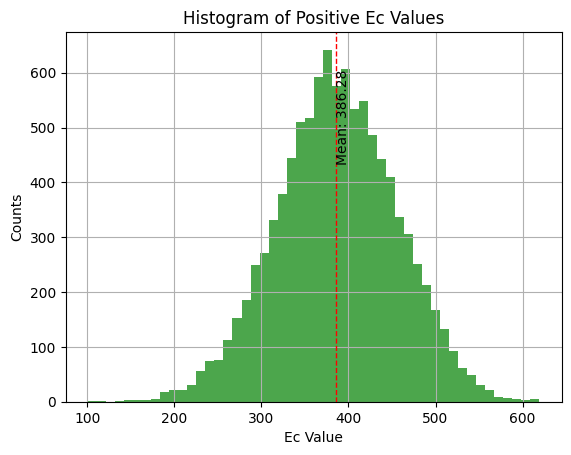

Number of positive Ec values: 10000
Number of negative Ec values: 0


In [34]:
#CT-2 subwatershed
Ea = ER[1]
Eb = ER[3]
Aa = WA[1]
Ab = WA[3]

# Initialize list to store Ec values for CT-2
Ec_values_CT2 = []

# Calculate Ec for CT-2 for each sample distribution
for i in range(len(sample_distributions[1])):
    # Use random erosion rate and uncertainty for CT-2
    Ea = np.random.choice(sample_distributions[1])
    Eb = np.random.choice(sample_distributions[3])
    
    # Use watershed area for CT-2 and CT-4
    Aa = (WA[1])
    Ab = (WA[3])
    
    r1 = Aa / (Aa - Ab)
    r2 = Ab / (Aa - Ab)
    Ec = (Ea * r1) - (Eb * r2)
    Ec_values_CT2.append(Ec)

# Calculate mean of Ec values
mean_positive_Ec = np.mean(Ec_values_CT2)

# Plot histogram of Ec values
plt.hist(Ec_values_CT2, bins=50, color='green', alpha=0.7)
plt.xlabel('Ec Value')
plt.ylabel('Counts')
plt.axvline(mean_positive_Ec, color='red', linestyle='dashed', linewidth=1)
plt.text(mean_positive_Ec, plt.ylim()[1]*0.9, f'Mean: {mean_positive_Ec:.2f}', rotation=90, verticalalignment='top')
plt.title('Histogram of Ec Values')
plt.grid(True)
plt.show()

# Count positive and negative Ec values
positive_count = sum(1 for value in Ec_values_CT2 if value > 0)
negative_count = len(Ec_values_CT2) - positive_count

print("Number of positive Ec values:", positive_count)
print("Number of negative Ec values:", negative_count)


### CT-4 Subwatershed Area

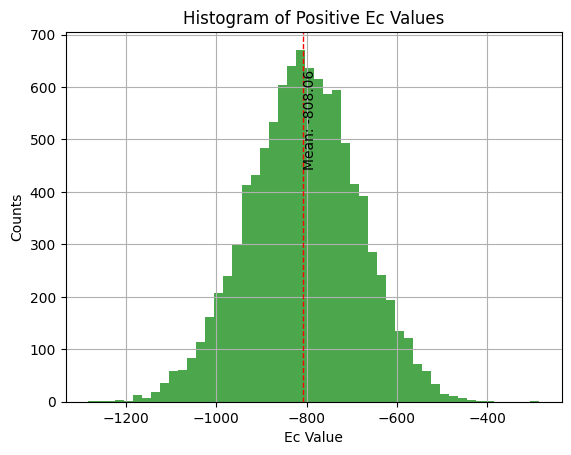

Number of positive Ec values: 0
Number of negative Ec values: 10000


In [35]:
#CT-4 subwatershed
Ea = ER[3]
Eb = ER[4]
Ec = ER[5]
Aa = WA[3]
Ab = WA[4]
Ac = WA[5]

# Initialize list to store Ec values for CT-4
Ec_values_CT4 = []

# Calculate Ec for CT-4 for each sample distribution
for i in range(len(sample_distributions[3])):
    # Use random erosion rate and uncertainty for CT-2
    Ea = np.random.choice(sample_distributions[3])
    Eb = np.random.choice(sample_distributions[4])
    Ec = np.random.choice(sample_distributions[5])
    
    # Use watershed area for CT-4 and CT-5, and CT-6
    Aa = (WA[3])
    Ab = (WA[4])
    Ac = (WA[5])
    
    r1 = Aa / (Aa - Ab - Ac)
    r2 = Ab / (Aa - Ab - Ac)
    r3 = Ac / (Aa - Ab - Ac)
    Ec = (Ea * r1) - (Eb * r2) - (Ec * r3)
    Ec_values_CT4.append(Ec)

# Calculate mean of Ec values
mean_positive_Ec = np.mean(Ec_values_CT4)

# Plot histogram of Ec values
plt.hist(Ec_values_CT4, bins=50, color='green', alpha=0.7)
plt.xlabel('Ec Value')
plt.ylabel('Counts')
plt.axvline(mean_positive_Ec, color='red', linestyle='dashed', linewidth=1)
plt.text(mean_positive_Ec, plt.ylim()[1]*0.9, f'Mean: {mean_positive_Ec:.2f}', rotation=90, verticalalignment='top')
plt.title('Histogram of Positive Ec Values')
plt.grid(True)
plt.show()

# Count positive and negative Ec values
positive_count = sum(1 for value in Ec_values_CT4 if value > 0)
negative_count = len(Ec_values_CT4) - positive_count

print("Number of positive Ec values:", positive_count)
print("Number of negative Ec values:", negative_count)


In [ ]:
# samples 1, 7, and 3 are special cases and need to be calculated separetly using just the uncertainty distrib

### CT-3 Subwatershed area

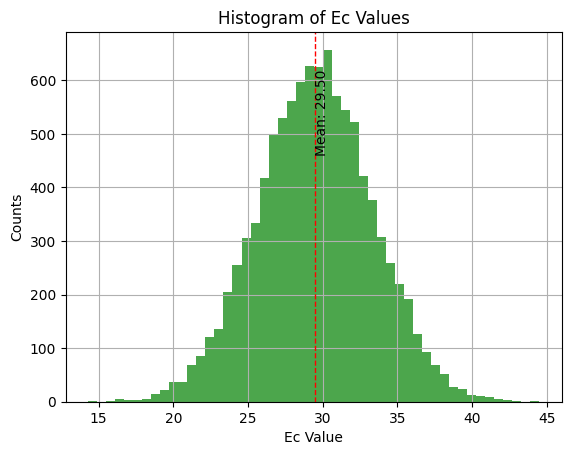

In [37]:
# plots the distribution of the CT-3 subwatershed erosion rates, since they are not a subwatershed. This was done earlier so its just to replot. 

Ec_values_CT3 = (sample_distributions[2])

# Calculate mean of Ec values
mean_positive_Ec = np.mean(Ec_values_CT3)

# Plot histogram of Ec values for CT-3
plt.hist(Ec_values_CT3, bins=50, color='green', alpha=0.7)
plt.xlabel('Ec Value')
plt.ylabel('Counts')
plt.axvline(mean_positive_Ec, color='red', linestyle='dashed', linewidth=1)
plt.text(mean_positive_Ec, plt.ylim()[1]*0.9, f'Mean: {mean_positive_Ec:.2f}', rotation=90, verticalalignment='top')
plt.title('Histogram of Ec Values')
plt.grid(True)
plt.show()

### CT-1 Subwatershed Area

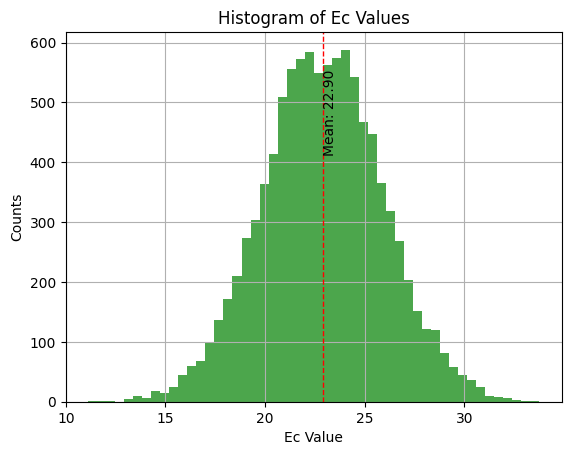

In [38]:
# plots the distribution of the CT-1 subwatershed erosion rates, since they are not a subwatershed. This was done earlier so its just to replot. 

Ec_values_CT1 = (sample_distributions[0])

# Calculate mean of Ec values
mean_positive_Ec = np.mean(Ec_values_CT1)

# Plot histogram of Ec values for CT-1
plt.hist(Ec_values_CT1, bins=50, color='green', alpha=0.7)
plt.xlabel('Ec Value')
plt.ylabel('Counts')
plt.axvline(mean_positive_Ec, color='red', linestyle='dashed', linewidth=1)
plt.text(mean_positive_Ec, plt.ylim()[1]*0.9, f'Mean: {mean_positive_Ec:.2f}', rotation=90, verticalalignment='top')
plt.title('Histogram of Ec Values')
plt.grid(True)
plt.show()

### CT-7 Subwatershed Area

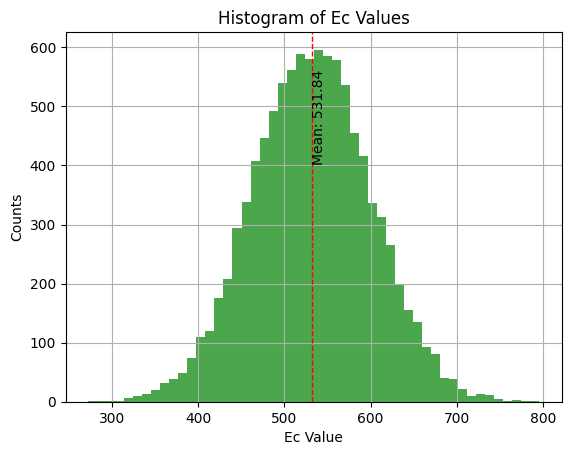

In [39]:
# plots the distribution of the CT-7 subwatershed erosion rates, since they are not a subwatershed. This was done earlier so its just to replot. 

Ec_values_CT7 = (sample_distributions[6])

# Calculate mean of Ec values
mean_positive_Ec = np.mean(Ec_values_CT7)

# Plot histogram of Ec values for CT-7
plt.hist(Ec_values_CT7, bins=50, color='green', alpha=0.7)
plt.xlabel('Ec Value')
plt.ylabel('Counts')
plt.axvline(mean_positive_Ec, color='red', linestyle='dashed', linewidth=1)
plt.text(mean_positive_Ec, plt.ylim()[1]*0.9, f'Mean: {mean_positive_Ec:.2f}', rotation=90, verticalalignment='top')
plt.title('Histogram of Ec Values')
plt.grid(True)
plt.show()

#### Positives only

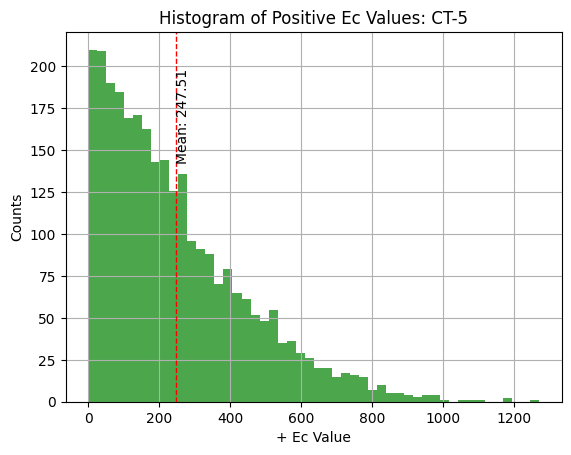

In [41]:
# Filter out positive Ec values
positive_Ec_values = [value for value in Ec_values_CT5 if value > 0]

# Calculate mean of Ec values
mean_positive_Ec = np.mean(positive_Ec_values)

# Plot histogram of positive Ec values for CT-5
plt.hist(positive_Ec_values, bins=50, color='green', alpha=0.7)
plt.xlabel('+ Ec Value')
plt.ylabel('Counts')
plt.axvline(mean_positive_Ec, color='red', linestyle='dashed', linewidth=1)
plt.text(mean_positive_Ec, plt.ylim()[1]*0.9, f'Mean: {mean_positive_Ec:.2f}', rotation=90, verticalalignment='top')
plt.title('Histogram of Positive Ec Values: CT-5')
plt.grid(True)
plt.show()